In [71]:
#Description: This program uses an ARIMA
#             to predict the stock price trend for Year 2020

In [72]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=16,8

In [73]:
#Read the data
dataset=pd.read_csv('/Users/Apple/Desktop/wrightstar/stockmodel/ULTA.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-25,330.880005,338.250000,330.880005,336.670013,336.670013,811900
1,2019-03-26,339.619995,345.630005,337.450012,342.899994,342.899994,847900
2,2019-03-27,343.700012,348.399994,343.339996,346.049988,346.049988,724600
3,2019-03-28,347.890015,351.429993,343.299988,345.230011,345.230011,667500
4,2019-03-29,347.600006,350.000000,344.950012,348.730011,348.730011,526500
...,...,...,...,...,...,...,...
248,2020-03-18,144.720001,149.059998,124.050003,128.520004,128.520004,2367200
249,2020-03-19,128.809998,153.649994,124.330002,146.990005,146.990005,2638300
250,2020-03-20,156.350006,164.949997,143.899994,148.059998,148.059998,3077400
251,2020-03-23,149.449997,155.000000,140.339996,143.240005,143.240005,1595500


In [74]:
#Parse strings to datetime type
dataset['Date']=pd.to_datetime(dataset['Date'], infer_datetime_format=True)
indexedDataset=dataset.set_index(['Date'])
indexedDataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-25,330.880005,338.250000,330.880005,336.670013,336.670013,811900
2019-03-26,339.619995,345.630005,337.450012,342.899994,342.899994,847900
2019-03-27,343.700012,348.399994,343.339996,346.049988,346.049988,724600
2019-03-28,347.890015,351.429993,343.299988,345.230011,345.230011,667500
2019-03-29,347.600006,350.000000,344.950012,348.730011,348.730011,526500
...,...,...,...,...,...,...
2020-03-18,144.720001,149.059998,124.050003,128.520004,128.520004,2367200
2020-03-19,128.809998,153.649994,124.330002,146.990005,146.990005,2638300
2020-03-20,156.350006,164.949997,143.899994,148.059998,148.059998,3077400


In [75]:
indexedDataset['Adj Close']

Date
2019-03-25    336.670013
2019-03-26    342.899994
2019-03-27    346.049988
2019-03-28    345.230011
2019-03-29    348.730011
                 ...    
2020-03-18    128.520004
2020-03-19    146.990005
2020-03-20    148.059998
2020-03-23    143.240005
2020-03-24    177.589996
Name: Adj Close, Length: 253, dtype: float64

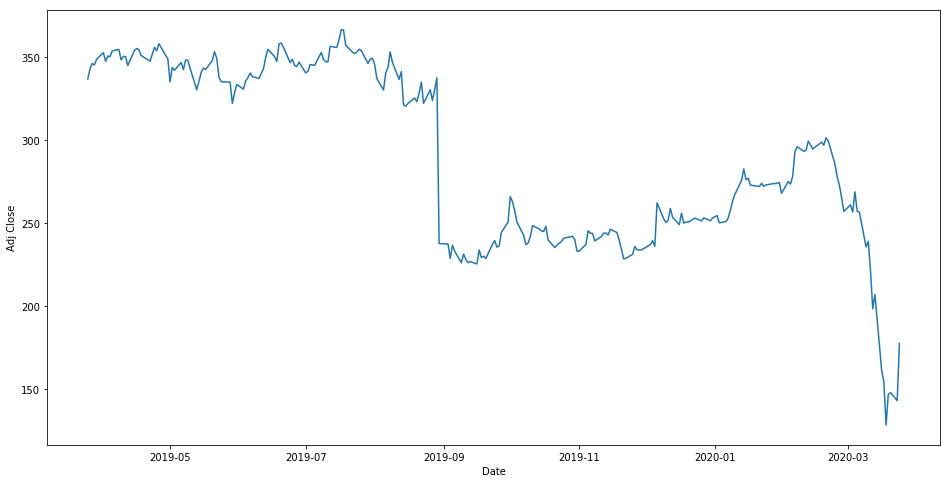

In [76]:
#plot graph
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.plot(indexedDataset['Adj Close'])

In [77]:
#Determing rolling statistics
rolmean=indexedDataset['Adj Close'].rolling(window=12).mean()

rolstd=indexedDataset['Adj Close'].rolling(window=12).std()
print(rolmean,rolstd)

Date
2019-03-25           NaN
2019-03-26           NaN
2019-03-27           NaN
2019-03-28           NaN
2019-03-29           NaN
                 ...    
2020-03-18    215.457501
2020-03-19    206.315000
2020-03-20    196.250000
2020-03-23    186.758333
2020-03-24    180.175833
Name: Adj Close, Length: 253, dtype: float64 Date
2019-03-25          NaN
2019-03-26          NaN
2019-03-27          NaN
2019-03-28          NaN
2019-03-29          NaN
                ...    
2020-03-18    46.225372
2020-03-19    48.136609
2020-03-20    46.472948
2020-03-23    44.495606
2020-03-24    38.691662
Name: Adj Close, Length: 253, dtype: float64


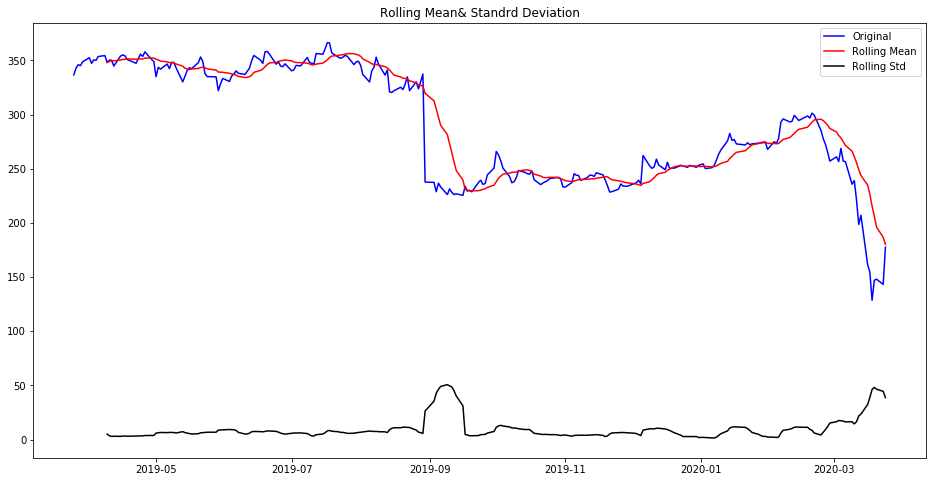

In [78]:
#plot rolling statistics
orig= plt.plot(indexedDataset['Adj Close'], color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd, color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean& Standrd Deviation')
plt.show(block=False)
## Not Stationarity 

In [79]:
#Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest= adfuller(indexedDataset['Adj Close'],autolag='AIC')

dfoutput= pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -0.754502
p-value                         0.832123
#Lags Used                      6.000000
Number of Observation Used    246.000000
Critical Value (1%)            -3.457215
Critical Value (5%)            -2.873362
Critical Value (10%)           -2.573070
dtype: float64


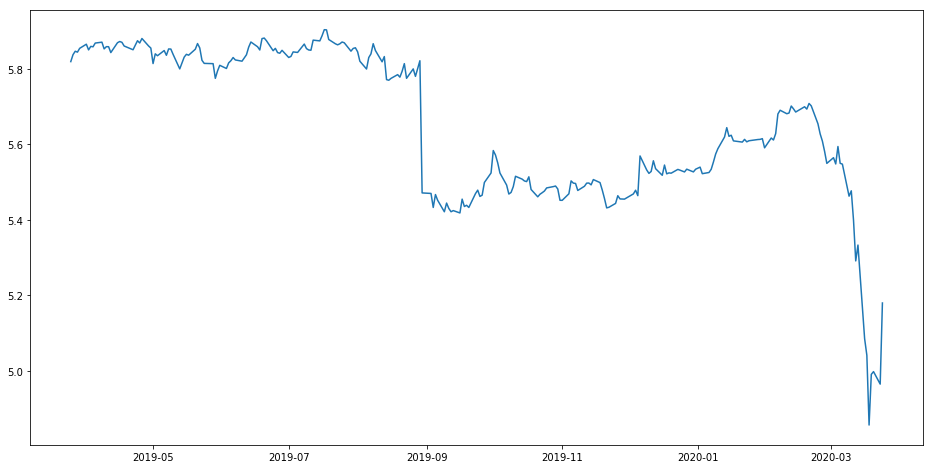

In [80]:
#Estimating trend
indexedDataset_logScale=np.log(indexedDataset['Adj Close'])
plt.plot(indexedDataset_logScale)

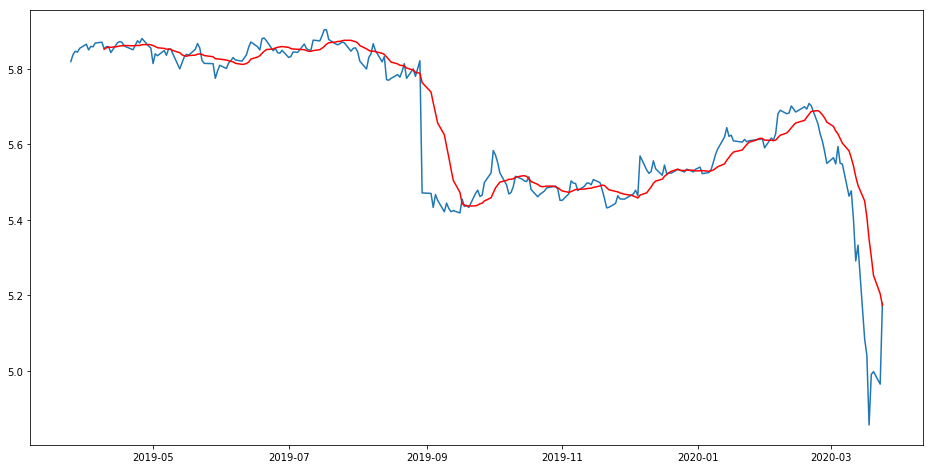

In [81]:
movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingSTD=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')
##Not Stationarity

In [82]:
datasetLogScaleMinusMovingAverage=indexedDataset_logScale-movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove Non Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

Date
2019-04-09    0.000573
2019-04-10    0.003226
2019-04-11    0.001295
2019-04-12   -0.013921
2019-04-15    0.010079
2019-04-16    0.011791
2019-04-17    0.009257
2019-04-18   -0.001382
2019-04-22   -0.010576
2019-04-23    0.001144
Name: Adj Close, dtype: float64

In [83]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage= timeseries.rolling(window=12).mean()
    movingSTD= timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    orig=plt.plot(timeseries, color='blue',label='Original')
    mean=plt.plot(movingAverage,color='red',label='Rolling Mean')
    std=plt.plot(movingSTD,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest= adfuller(timeseries,autolag='AIC')
    dfoutput= pd. Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observation Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

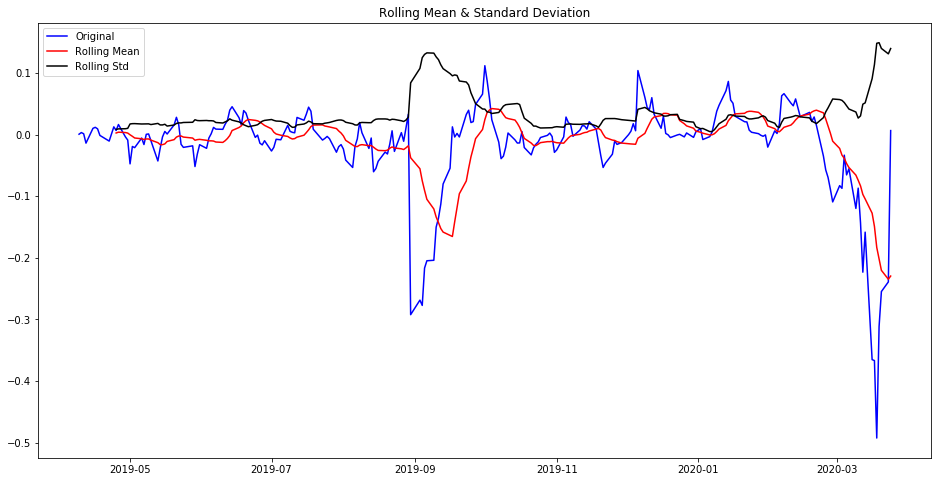

Results of Dickey-Fuller Test:
Test Statistic                 -3.734202
p-value                         0.003657
#Lags Used                      7.000000
Number of Observation Used    234.000000
Critical Value (1%)            -3.458608
Critical Value (5%)            -2.873972
Critical Value (10%)           -2.573396
dtype: float64


In [84]:
test_stationarity(datasetLogScaleMinusMovingAverage)

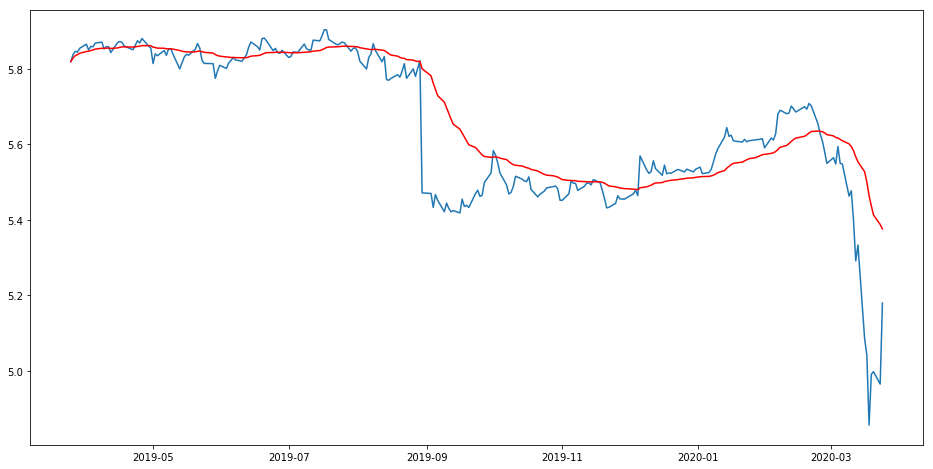

In [85]:
exponentialDecayWeightedAverage=indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')


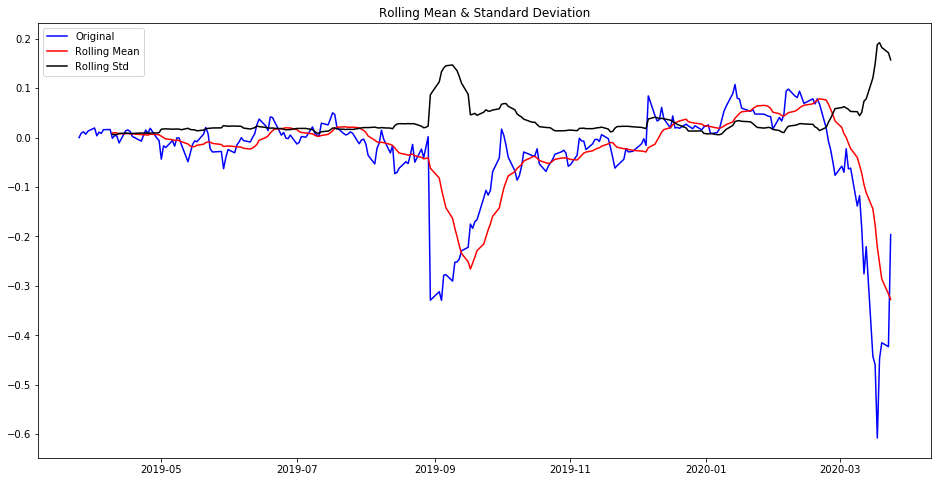

Results of Dickey-Fuller Test:
Test Statistic                 -2.453732
p-value                         0.127141
#Lags Used                      7.000000
Number of Observation Used    245.000000
Critical Value (1%)            -3.457326
Critical Value (5%)            -2.873410
Critical Value (10%)           -2.573096
dtype: float64


In [86]:
datasetLogScaleMinusMovingExponentialDecayAverage=indexedDataset_logScale-exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

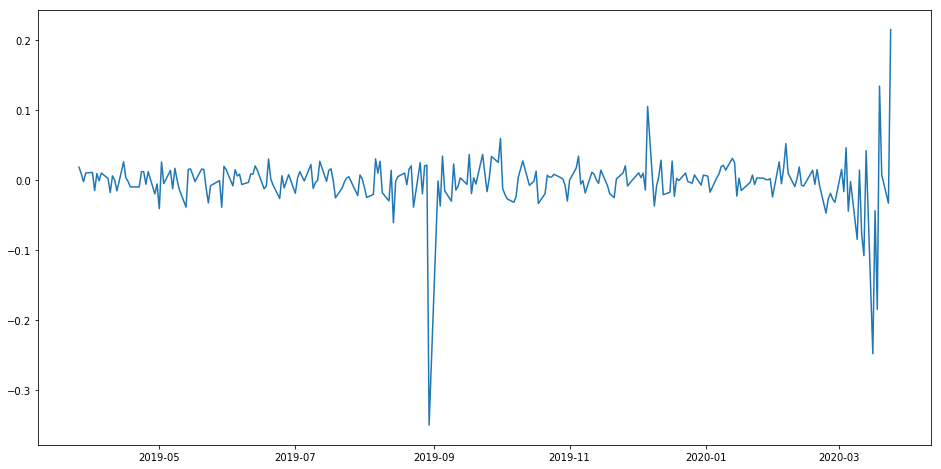

In [87]:
datasetLogDiffShifting= indexedDataset_logScale-indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

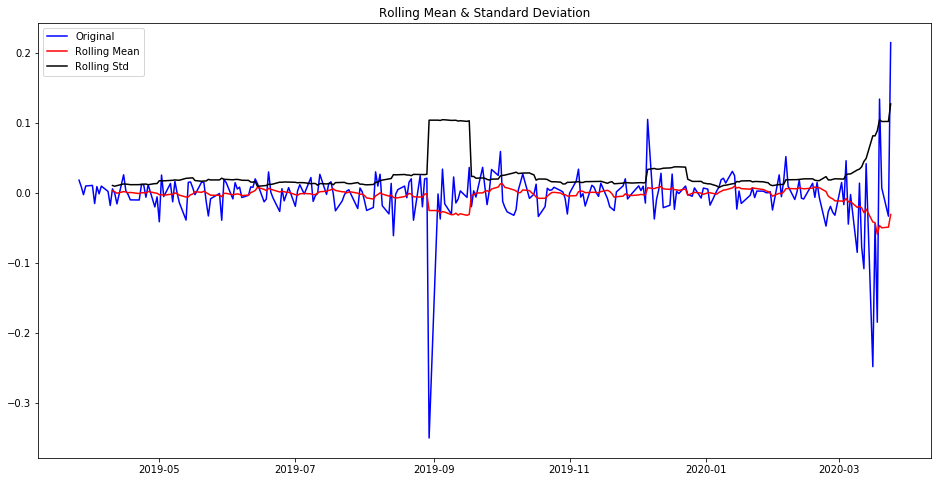

Results of Dickey-Fuller Test:
Test Statistic                 -5.635673
p-value                         0.000001
#Lags Used                      6.000000
Number of Observation Used    245.000000
Critical Value (1%)            -3.457326
Critical Value (5%)            -2.873410
Critical Value (10%)           -2.573096
dtype: float64


In [101]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

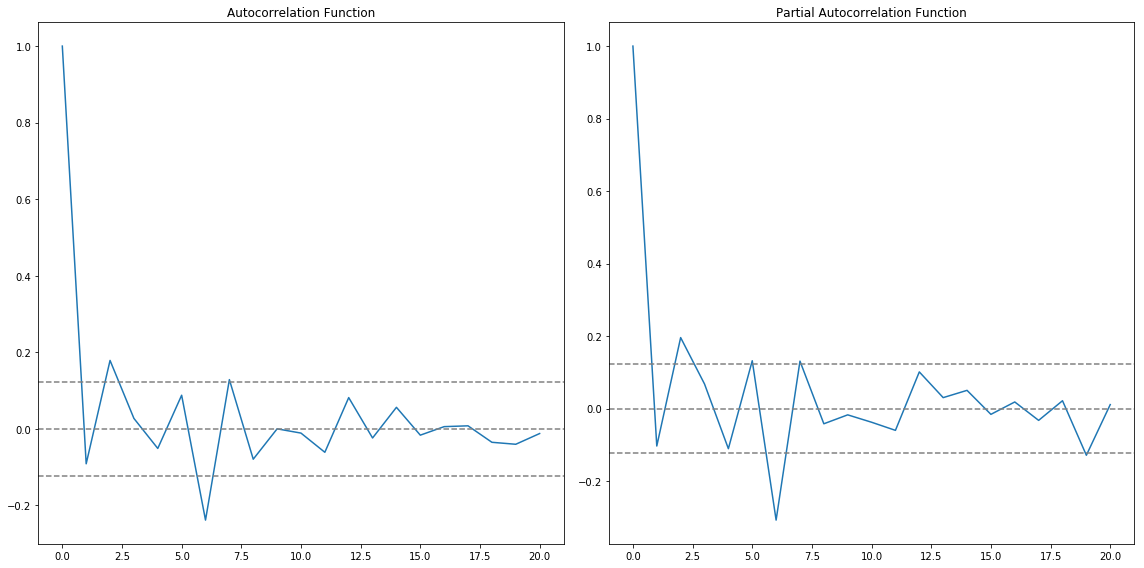

In [102]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(datasetLogDiffShifting, nlags=20)
lag_pacf=pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.3948')

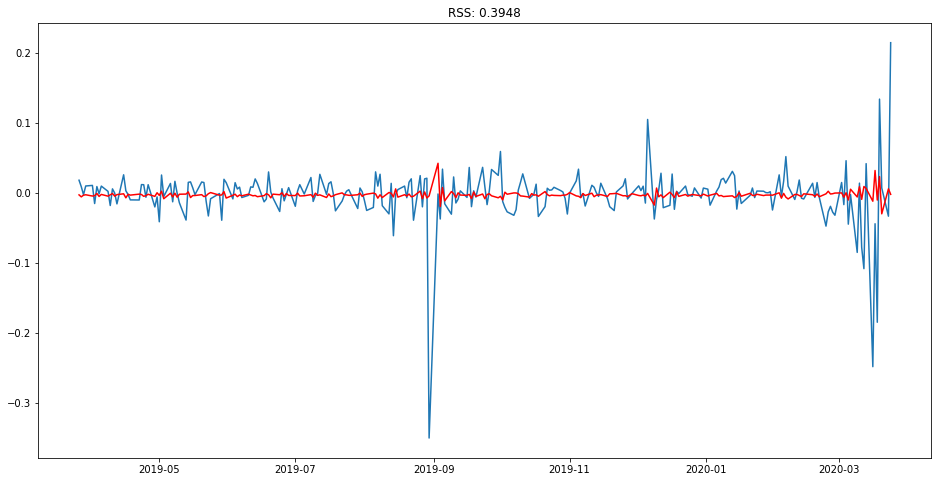

In [115]:
from statsmodels.tsa.arima_model import ARIMA

model= ARIMA(indexedDataset_logScale, order=(1,1,1))
results_ARIMA =model.fit(sidp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting)**2))


In [118]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2019-03-26   -0.002619
2019-03-27   -0.005471
2019-03-28   -0.003103
2019-03-29   -0.002474
2019-04-01   -0.004303
dtype: float64


In [119]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum= predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2019-03-26   -0.002619
2019-03-27   -0.008090
2019-03-28   -0.011193
2019-03-29   -0.013666
2019-04-01   -0.017969
dtype: float64


In [121]:
predictions_ARIMA_log=pd.Series(indexedDataset_logScale, index=indexedDataset_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2019-03-25    5.819103
2019-03-26    5.834820
2019-03-27    5.838493
2019-03-28    5.833018
2019-03-29    5.840632
dtype: float64

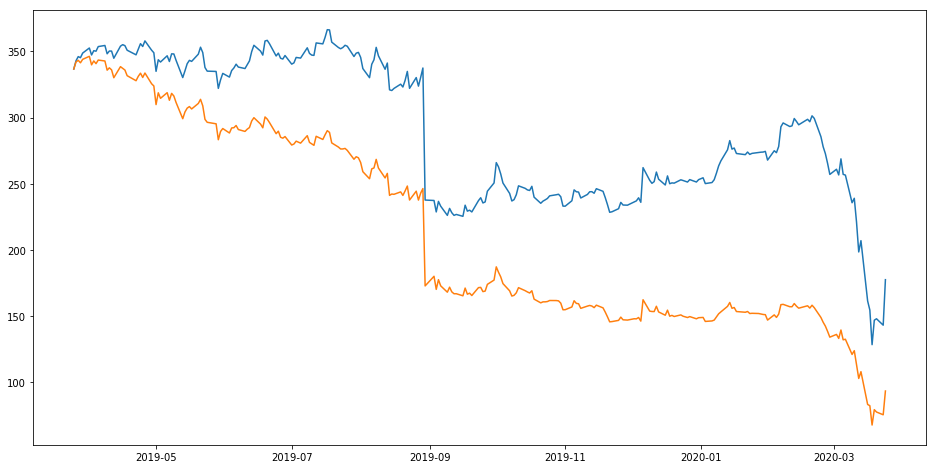

In [123]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset['Adj Close'])
plt.plot(predictions_ARIMA)

In [125]:
len(indexedDataset_logScale)

253

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:293: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  stop = base_index._start + (key + 1) * base_index._step
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:293: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  stop = base_index._start + (key + 1) * base_index._step
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:294: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  index = RangeIndex(start=base_index._start,
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:296: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  step=base_index._step)
/anaconda3/lib/python3.7/site-package

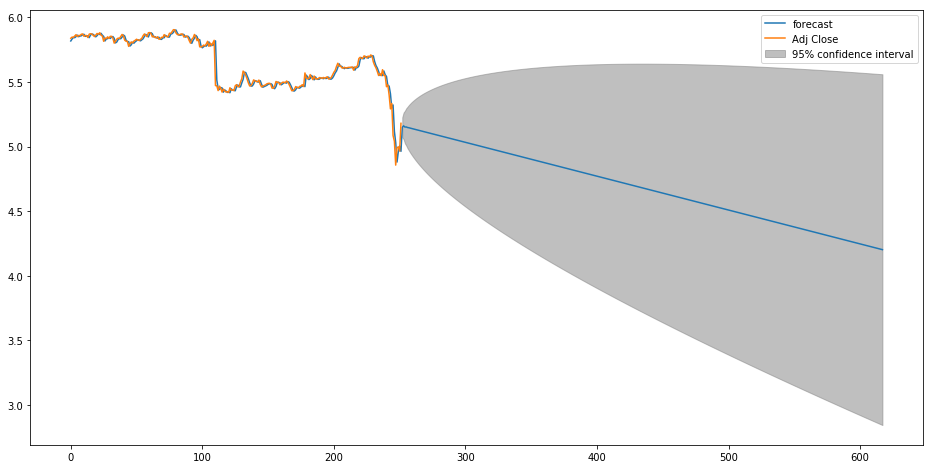

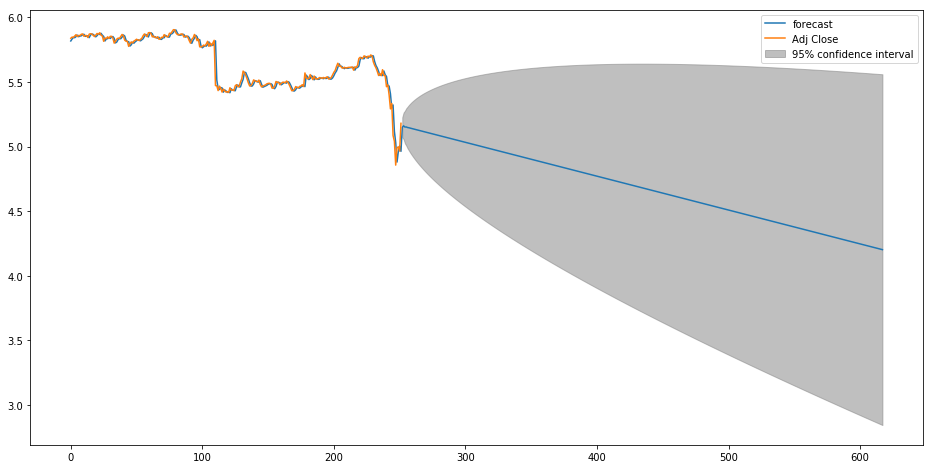

In [126]:
results_ARIMA.plot_predict(1,618)

In [129]:
x=results_ARIMA.forecast(steps=365)

In [130]:
x

(array([5.14865418, 5.15994763, 5.15046653, 5.1512327 , 5.14694429,
        5.1451491 , 5.14212411, 5.13970573, 5.13698814, 5.13441813,
        5.13177533, 5.12916843, 5.12654383, 5.12392796, 5.12130778,
        5.11868972, 5.11607062, 5.11345203, 5.11083319, 5.10821447,
        5.1055957 , 5.10297695, 5.10035819, 5.09773943, 5.09512068,
        5.09250192, 5.08988316, 5.08726441, 5.08464565, 5.08202689,
        5.07940813, 5.07678938, 5.07417062, 5.07155186, 5.06893311,
        5.06631435, 5.06369559, 5.06107684, 5.05845808, 5.05583932,
        5.05322056, 5.05060181, 5.04798305, 5.04536429, 5.04274554,
        5.04012678, 5.03750802, 5.03488927, 5.03227051, 5.02965175,
        5.027033  , 5.02441424, 5.02179548, 5.01917672, 5.01655797,
        5.01393921, 5.01132045, 5.0087017 , 5.00608294, 5.00346418,
        5.00084543, 4.99822667, 4.99560791, 4.99298915, 4.9903704 ,
        4.98775164, 4.98513288, 4.98251413, 4.97989537, 4.97727661,
        4.97465786, 4.9720391 , 4.96942034, 4.96